# Data understanding

## 1.Dataset Description

**Dataset description from Kaggle :**

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

**Content :**

This dataset consists of the following files:

**movies_metadata.csv**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**keywords.csv**: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

**credits.csv**: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

**links.csv**: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

**links_small.csv**: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

**ratings_small.csv**: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here: *https://grouplens.org/datasets/movielens/latest/*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

### movies_metadata dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/movies_metadata.csv')
df.head().transpose()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features:**

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id**: The ID of the move.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of **45,466 movies** with **24 features**. Most of the features have very few NaN values (apart from **homepage** and **tagline**).



---



The other two related dateset: credites dataset and keywords dataset.

### credits dataset

In [7]:
credits_df = pd.read_csv('/content/drive/MyDrive/BDA/input/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


**Features:**
* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

In [8]:
credits_df.shape

(45476, 3)

In [9]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### keywords dataset

In [10]:
keywords_df = pd.read_csv('/content/drive/MyDrive/BDA/input/keywords.csv')
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [11]:
keywords_df.shape

(46419, 2)

In [12]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB




---



In order to handle the huge number of missing value and a different vote system, we are looking for another movies dataset.

### IMDb movies dataset
IMDb movies extensive dataset

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

* The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

* The ratings dataset includes 85,855 rating details from demographic perspective.

* The names dataset includes 297,705 cast members with personal attributes such as birth details, death details, height, spouses, children, etc.

* The title principals dataset includes 835,513 cast members roles in movies with attributes such as IMDb title id, IMDb name id, order of importance in the movie, role, and characters played.

The IMDB extensive dataset is good for us to dealing with the missing values in TMDB dataset since it has much more number of movies and their own rating system.

In [13]:
imdb_movies_df = pd.read_csv('/content/drive/MyDrive/BDA/input/IMDb movies.csv')
imdb_movies_df.head().transpose()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
year,1894,1906,1911,1912,1911
date_published,1894-10-09,1906-12-26,1911-08-19,1912-11-13,1911-03-06
genre,Romance,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy"
duration,45,70,53,100,68
country,USA,Australia,"Germany, Denmark",USA,Italy
language,None,None,NaN,English,Italian
director,Alexander Black,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan"


In [14]:
imdb_movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

We can see the related feature between IMDB and TMDB:
* '**imdb_title_id**' : title ID on IMDb, corresponding to the feature 'imdb_id' in TMDB.
* '**title**' : title name, corresponding to the feature 'title' in TMDB.
* '**original_title**' : original title name, corresponding to the feature 'original_title' in TMDB.
* '**year**' : year of release, related to the feature 'release_date' in TMDB.
* '**date_published**' : date of release, corresponding to the feature 'release_date' in TMDB.
* '**genre**' : movie genre, corresponding to the feature 'genres' in TMDB.
* '**duration**' : duration (in minutes), corresponding to the feature 'runtime' in TMDB.
* '**country**' : movie country, corresponding to the feature 'production_countries' in TMDB.
* '**language**' : movie language, corresponding to the feature 'spoken_languages' in TMDB.
* '**director**' : director name, related to the feature 'crew' in credits datset.
* '**writer**' : writer name
* '**production_company**' : production company, corresponding to the feature 'production_companies' in TMDB.
* '**actors**' : actor names, related to the feature 'cast' in credits datset.
* '**description**' : plot descrption, related to the feature 'overview' in credits datset.
* '**avg_vote**' : average vote
* '**votes**' : number of votes received
* '**budget**' : budget, corresponding to the feature 'budget' in TMDB.
* '**usa_gross_income**' : USA gross income
* '**worlwide_gross_income**' : worldwide gross income, corresponding to the feature 'revenue' in TMDB.
* '**metascore**' : metascore rating
* '**reviews_from_users**' : number of reviews from users
* '**reviews_from_critics**' : number of reviews from critics

In [15]:
df.shape, imdb_movies_df.shape

((45466, 24), (85855, 22))

In [16]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Feature 'usa_gross_income' and 'metascore' just have few non-null values and not related to TMDB dataset, so we don't need it, 'year' is included in date_published, so we also don't need it.

Befor join, we drop the duplicated records.

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(45453, 24)

In [19]:
df = pd.merge(df, imdb_movies_df[imdb_movies_df.columns.difference(['usa_gross_income', 'metascore', 'year'])], left_on="imdb_id", right_on="imdb_title_id", suffixes=('_tmdb', '_imdb'), how="left")

In [20]:
df.shape

(45453, 43)

After merge the imdb dataset, we can drop 'imdb_id' and 'imdb_title_id'.

In [21]:
df = df.drop(["imdb_id", "imdb_title_id"], axis=1)

## 2.Data Cleaning
In this stage, we will handle the missing values of TMDB dataset by filling with the value from IMDB dataset.

In [22]:
df.isnull().sum()

adult                        0
belongs_to_collection    40959
budget_tmdb                  0
genres                       0
homepage                 37673
id                           0
original_language           11
original_title_tmdb          0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title_tmdb                   6
video                        6
vote_average                 6
vote_count                   6
actors                   11378
avg_vote                 11367
budget_imdb              31740
country                  11371
date_published           11367
description              11592
director                 11370
duration                 11367
genre                    11367
language

##### **adult:**

In [23]:
df['adult'].value_counts()

False                                                                                                                             45441
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are close to **0 adult movies** in this dataset. The **adult** feature therefore is not of much use to us and can be safely dropped.

In [24]:
df = df.drop('adult', axis=1)

##### **belongs_to_collection:**


In [25]:
df['belongs_to_collection'].isnull().sum()

40959

Consider the huge number of missing valuse in 'belongs_to_collection', instead of drop the nan, we turned the feature into a Boolean variable. 1 indicates a movie is a part of collection, and the same time we keep the all notnull values into a new dataframe for further analysing.

In [26]:
df_fran = df[df['belongs_to_collection'].notnull()]
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

##### **budget:**

In [27]:
df["budget_imdb"].value_counts()

$ 5000000       371
$ 10000000      343
$ 2000000       338
$ 3000000       326
$ 1000000       323
               ... 
$ 652675          1
DKK 18000000      1
$ 627000          1
$ 1158035         1
FIM 4773394       1
Name: budget_imdb, Length: 2796, dtype: int64

The budget value in IMDB start with a currency sign which is different with the budget value in TMDB that only in dollars. So we extract the budget value which start with '$'.

In [28]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN      31740
True     10952
False     2761
Name: budget_imdb, dtype: int64

In [29]:
# Function to clean the budget_imdb
# Search for budget_imdb that not start with '$', fill with pd.NA
def Clean_budget_imdb(budget_imdb):
    if re.search('\$ \d+', budget_imdb):
        return budget_imdb
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['budget_imdb'] = df['budget_imdb'].astype(str).apply(Clean_budget_imdb)

In [30]:
df.replace(df[df["budget_imdb"].str.startswith('^$')==True]["budget_imdb"], pd.NA, inplace=True)

In [31]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN     34501
True    10952
Name: budget_imdb, dtype: int64

Then, we remove the '$'.

In [32]:
df["budget_imdb"] = df["budget_imdb"].str.extract('(\d+)', expand=False)

Before we handle the missing values in budget, we tansform the budget values into numeric value and treat 0 as nan value.

In [33]:
df['budget_tmdb'] = pd.to_numeric(df['budget_tmdb'], errors='coerce')
df['budget_imdb'] = pd.to_numeric(df['budget_imdb'], errors='coerce')
df['budget_tmdb'] = df['budget_tmdb'].replace(0, np.nan)
df['budget_imdb'] = df['budget_imdb'].replace(0, np.nan)
df[df['budget_tmdb'].isnull()].shape

(36564, 40)

We  got a huge number of missing values in budget_tmdb, let's use the budget value from imdb to try to fill it.

In [34]:
df["budget_tmdb"] = df['budget_tmdb'].fillna(df['budget_imdb'])
df[df['budget_tmdb'].isnull()].shape

(32279, 40)

After fill in the na value in 'budget_tmdb', we can drop 'budget_imdb' and the rest missing values.

In [35]:
df = df.drop('budget_imdb', axis=1)
df.dropna(subset=['budget_tmdb'], inplace=True)

##### **genres:**


In [36]:
df[['genres','genre']].isnull().sum()

genres      0
genre     793
dtype: int64

It seems that 'genre' in TMDB didn't has nan values, but how about the empty list? Let's first exact the list of the names of genres.

In [37]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [38]:
df[df['genres'].str.len()==0]['genres']

401      []
839      []
2122     []
2212     []
2301     []
         ..
44400    []
44513    []
44790    []
44853    []
45366    []
Name: genres, Length: 115, dtype: object

We can see there are some empty genres list, let's turn them into nan values and try to use the genres values from IMDB to fill it.

In [39]:
df['genres'] = df['genres'].apply(lambda x: np.nan if len(x)==0 else x)

In [40]:
df[['genres','genre']].head()

,genres,genre
0,"[Animation, Comedy, Family]","Animation, Adventure, Comedy"
1,"[Adventure, Fantasy, Family]","Adventure, Comedy, Family"
2,"[Romance, Comedy]","Comedy, Romance"
3,"[Comedy, Drama, Romance]","Comedy, Drama, Romance"
4,[Comedy],"Comedy, Family, Romance"


We noticed that the genres values from TMDB and IMDB have a different format, so let's fix this issue by convert IMDB genre feature into a list.

In [41]:
df['genre'] =  df['genre'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

During the converting, we need to pay attention to the nan value in IMDB.

In [42]:
df['genre'] = df['genre'].apply(lambda x: [] if x==['nan'] else x)

In [43]:
df['genres'] = df['genres'].fillna(df['genre'])

In [44]:
df[df['genres'].str.len()==0]['genres']

7894     []
9527     []
13835    []
15787    []
19361    []
19417    []
20679    []
21244    []
22943    []
23086    []
25551    []
26991    []
28449    []
30382    []
33627    []
39456    []
42078    []
43788    []
44790    []
Name: genres, dtype: object

After these missing genres in TMDB was filled, now we can drop gener from imdb dataset.

In [45]:
df = df.drop('genre', axis=1)

##### **homepage:**


In [46]:
df['homepage'].isnull().sum()

9993

Consider the huge number of missing values in homepage feature, we converte the feature into a Boolean variable that will indicate if a movie has a homepage or not.

In [47]:
df['homepage'] = df['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

##### **id:**

We convert the 'id' feature into int, and it is used as the key for join the creadit dataset and keyword dataset.

In [48]:
df['id'].isnull().sum()

0

There is no missing vaules in 'id'.

In [49]:
df['id'] = df['id'].astype('int')

##### **original_title:**

In [50]:
df[['original_title_tmdb','original_title_imdb']].isnull().sum()

original_title_tmdb      0
original_title_imdb    793
dtype: int64

No need the original_title from imdb, drop it.

In [51]:
df = df.drop("original_title_imdb", axis=1)

In [52]:
df[df['original_title_tmdb'] != df['title_tmdb']][['title_tmdb', 'original_title_tmdb']].head()

,title_tmdb,original_title_tmdb
28,The City of Lost Children,La Cité des Enfants Perdus
57,The Postman,Il postino
79,The White Balloon,بادکنک سفید
81,Antonia's Line,Antonia
110,Rumble in the Bronx,紅番區


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so.

In [53]:
df = df.drop('original_title_tmdb', axis=1)

##### **overview:**

In [54]:
df[['overview','description']].isnull().sum()

overview        58
description    828
dtype: int64

In [55]:
df[['overview','description']].head()

,overview,description
0,"Led by Woody, Andy's toys live happily in his ...",A cowboy doll is profoundly threatened and jea...
1,When siblings Judy and Peter discover an encha...,When two kids find and play a magical board ga...
2,A family wedding reignites the ancient feud be...,John and Max resolve to save their beloved bai...
3,"Cheated on, mistreated and stepped on, the wom...","Based on Terry McMillan's novel, this film fol..."
4,Just when George Banks has recovered from his ...,George Banks must deal not only with the pregn...


Let's use the feature 'description' from IMDB to fill the nan values in the feature 'overview' from TMDB, and then we can drop the feature 'description'. The rest missing values in 'overview' can be filled with ''.

In [56]:
df["overview"] = df['overview'].fillna(df['description'])
df[df['overview'].isnull()].shape

(17, 36)

In [57]:
df = df.drop('description', axis=1)
df["overview"] = df['overview'].fillna('')

##### **popularity:**
For popularity, we convert the values into float.

In [58]:
df['popularity'].isnull().sum()

0

There is no missing values in 'popularity'.

In [59]:
df['popularity'] = df['popularity'].astype('float')

##### **production_companies:**

In [60]:
df[['production_companies','production_company']].isnull().sum()

production_companies      0
production_company      890
dtype: int64

It seems that 'production_companies' in TMDB didn't has nan values, but how about the empty list? Let's first exact the list of the names of production_companies.

In [61]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [62]:
df[df['production_companies'].str.len()==0]['production_companies']

57       []
140      []
240      []
357      []
386      []
         ..
45359    []
45366    []
45395    []
45396    []
45409    []
Name: production_companies, Length: 1521, dtype: object

We can see there are some empty list, let's turn them into nan values and try to use the production_company values from IMDB to fill it.



In [63]:
df['production_companies'] = df['production_companies'].apply(lambda x: np.nan if len(x)==0 else x)

In [64]:
df[['production_companies','production_company']].head()

,production_companies,production_company
0,[Pixar Animation Studios],Pixar Animation Studios
1,"[TriStar Pictures, Teitler Film, Interscope Co...",TriStar Pictures
2,"[Warner Bros., Lancaster Gate]",Lancaster Gate
3,[Twentieth Century Fox Film Corporation],Twentieth Century Fox
4,"[Sandollar Productions, Touchstone Pictures]",Sandollar Productions


We noticed that the production_companies from TMDB and IMDB have a different format, so let's fix this issue by convert IMDB production_company feature into a list.

In [65]:
df['production_company'] =  df['production_company'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [66]:
# Carefully deal with the 'nan'
df['production_company'] = df['production_company'].apply(lambda x: [] if x==['nan'] else x)

In [67]:
df['production_companies'] = df['production_companies'].fillna(df['production_company'])

In [68]:
df[df['production_companies'].str.len()==0]['production_companies']

1151     []
1612     []
2061     []
2461     []
2813     []
         ..
44562    []
44790    []
44804    []
44853    []
45122    []
Name: production_companies, Length: 252, dtype: object

After these missing values in production_companies were filled in, we can drop the 'production_company feature' from IMDB.

In [69]:
df = df.drop('production_company', axis=1)

##### **production_countries(TBD):**

In [70]:
df[['production_countries','country']].isnull().sum()

production_countries      0
country                 794
dtype: int64

It seems that 'production_countries' in TMDB didn't has nan values, but how about the empty list? Let's first exact the list of the names of production_countries.

In [71]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [72]:
df[df['production_countries'].str.len()==0]['production_countries']

152      []
207      []
240      []
244      []
254      []
         ..
45347    []
45359    []
45366    []
45395    []
45396    []
Name: production_countries, Length: 689, dtype: object

We can see there are some empty list, let's turn them into nan values and try to use the country values from IMDB to fill it.



In [73]:
df['production_countries'] = df['production_countries'].apply(lambda x: np.nan if len(x)==0 else x)

In [74]:
df[['production_countries','country']].head()

,production_countries,country
0,[United States of America],USA
1,[United States of America],USA
2,[United States of America],USA
3,[United States of America],USA
4,[United States of America],USA


We noticed that the production_countries from TMDB and IMDB have a different format, so let's fix this issue by convert IMDB country feature into a list.

In [75]:
df['country'] =  df['country'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [76]:
# Carefully deal with 'nan'
df['country'] = df['country'].apply(lambda x: [] if x==['nan'] else x)

In [77]:
df['production_countries'] = df['production_countries'].fillna(df['country'])

In [78]:
df[df['production_countries'].str.len()==0]['production_countries']

2813     []
9527     []
11331    []
12051    []
12252    []
         ..
44244    []
44462    []
44790    []
44804    []
45122    []
Name: production_countries, Length: 95, dtype: object

After these missing values in production_countries were filled in, we can drop the country feature from IMDB.

In [79]:
df = df.drop('country', axis=1)

##### **release_date:**


In [80]:
df[['release_date','date_published']].isnull().sum()

release_date        4
date_published    793
dtype: int64

There is no missing values in release_date, we can simply drop data_published feature.

In [81]:
df = df.drop('date_published', axis=1)

##### **revenue:**

In [82]:
df['revenue'].isnull().sum()

0

It seems that 'revenue' in TMDB didn't has nan values, but how about the 0 values? 

In [83]:
df[df['revenue'] == 0].shape

(7397, 32)

We see that the majority of the movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Let's convert the 0 values in revenue and use the worlwide_gross_income values from IMDB to fill in.

In [84]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [85]:
df[['revenue', 'worlwide_gross_income']].head()

,revenue,worlwide_gross_income
0,373554033.0,$ 404265438
1,262797249.0,$ 262821940
2,NaN,$ 71518503
3,81452156.0,$ 81452156
4,76578911.0,$ 76594107


The worlwide_gross_income value in IMDB start with a currency sign which is different with the revenue value in TMDB that only in dollars. So we extract the worlwide_gross_income value which start with '$'.

In [86]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True     8597
NaN      4572
False       5
Name: worlwide_gross_income, dtype: int64

In [87]:
# Function to clean the worlwide_gross_income
# Search for worlwide_gross_income that not start with '$', fill with pd.NA
def Clean_worlwide_gross_income(worlwide_gross_income):
    if re.search('\$ \d+', worlwide_gross_income):
        return worlwide_gross_income
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(str).apply(Clean_worlwide_gross_income)

In [88]:
df.replace(df[df["worlwide_gross_income"].str.startswith('^$')==True]["worlwide_gross_income"], pd.NA, inplace=True)

In [89]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True    8597
NaN     4577
Name: worlwide_gross_income, dtype: int64

Before we use the worlwide_gross_income values to fill in the missing values in revenue, we need to remove the '$' in worlwide_gross_income values.

In [90]:
df["worlwide_gross_income"] = df["worlwide_gross_income"].str.extract('(\d+)', expand=False)

In [91]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['worlwide_gross_income'] = pd.to_numeric(df['worlwide_gross_income'], errors='coerce')
df['revenue'] = df['revenue'].replace(0, np.nan)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace(0, np.nan)

In [92]:
df["revenue"] = df['revenue'].fillna(df['worlwide_gross_income'])
df[df['revenue'].isnull()].shape

(4118, 32)

After the missing values in revenue was filled in, we can drop worlwide_gross_income feature and the rest missing values in revenue.

In [93]:
df = df.drop('worlwide_gross_income', axis=1)
df.dropna(subset=['revenue'], inplace=True)

##### **runtime:**

In [94]:
df[['runtime','duration']].isnull().sum()

runtime       4
duration    122
dtype: int64

In [95]:
df[df['runtime'] == 0].shape, df[df['duration'] == 0].shape

((65, 31), (0, 31))

Before we use the duration values to fill in the missing values in runtime, we turn the 0 runtime to nan.

In [96]:
df['runtime'] = df['runtime'].replace(0, np.nan)

In [97]:
df[['runtime','duration']].isnull().sum()

runtime      69
duration    122
dtype: int64

In [98]:
df["runtime"] = df['runtime'].fillna(df['duration'])

In [99]:
df[['runtime','duration']].isnull().sum()

runtime       1
duration    122
dtype: int64

After all the missing values in runtime was filled in, we can drop duration feature.

In [100]:
df = df.drop('duration', axis=1)

##### **spoken_languages:**

In [101]:
df[['spoken_languages', 'language']].isnull().sum()

spoken_languages      0
language            134
dtype: int64

It seems that 'spoken_languages' in TMDB didn't has nan values, but how about the empty list? Let's first exact the list of the names of spoken_languages.

In [102]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [103]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

401      []
606      []
1442     []
1486     []
2191     []
         ..
43072    []
43379    []
43472    []
43834    []
43867    []
Name: spoken_languages, Length: 120, dtype: object

We can see there are some empty list, let's turn them into nan values and try to use the language values from IMDB to fill it.

In [104]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: np.nan if len(x)==0 else x)

In [105]:
df[['spoken_languages', 'language']].head()

,spoken_languages,language
0,[English],English
1,"[English, Français]","English, French"
2,[English],"English, Italian, German"
3,[English],English
4,[English],English


We noticed that the spoken_languages from TMDB and IMDB have a different format, so let's fix this issue by convert language feature into a list.

In [106]:
df['language'] =  df['language'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [107]:
# Carefully deal with the 'nan'
df['language'] = df['language'].apply(lambda x: [] if x==['nan'] else x)

In [108]:
df['spoken_languages'] = df['spoken_languages'].fillna(df['language'])

In [109]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

8307     []
14978    []
16775    []
31363    []
32476    []
34491    []
43379    []
Name: spoken_languages, dtype: object

Most of missing values in spoken_languages were filled in, we can drop the language feature from IMDB.



In [110]:
df = df.drop('language', axis=1)

##### **status:**

In [111]:
df['status'].value_counts()

Released           9027
Post Production      14
Rumored               8
In Production         1
Planned               1
Name: status, dtype: int64

Almost every movie is indeed released. So we just simply drop this feature.

In [112]:
df = df.drop('status', axis=1)

##### **title:**

In [113]:
df[['title_tmdb','title_imdb']].isnull().sum()

title_tmdb      0
title_imdb    122
dtype: int64

There is no missing values in feature title_tmdb, so we don't need the title_imdb feature, drop it.

In [114]:
df = df.drop('title_imdb', axis=1)

#####**video:**

In [115]:
df['video'].value_counts()

False    9053
True        3
Name: video, dtype: int64

Almost all the movies didn't have a video on tmdb, we can simply drop this feature.

In [116]:
df = df.drop('video', axis=1)

#####**poster_path:**
Useless feature, drop it.

In [117]:
df = df.drop('poster_path', axis=1)

##### **vote_average and avg_vote:**

In [118]:
df[['vote_average','avg_vote']].isnull().sum()

vote_average      0
avg_vote        122
dtype: int64

In [119]:
df[df['vote_average'] == 0].shape

(45, 25)

In [120]:
df[df['avg_vote'] == 0].shape

(0, 25)

Let's turn the 0 values into nan, and then drop the nan.

In [121]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df.dropna(subset=['vote_average','avg_vote'], inplace=True)

##### **vote_count and votes:**

In [122]:
df[['vote_count','votes']].isnull().sum()

vote_count    0
votes         0
dtype: int64

In [123]:
df[df['vote_count'] == 0].shape

(0, 25)

In [124]:
df[df['votes'] == 0].shape

(0, 25)

There is no missing values and 0 valuesin vote_count.

##### **reviews_from_critics and reviews_from_users:**

In [125]:
df[['reviews_from_critics','reviews_from_users']].isnull().sum()

reviews_from_critics    67
reviews_from_users      71
dtype: int64

In [126]:
df[df['reviews_from_critics'] == 0].shape

(0, 25)

In [127]:
df[df['reviews_from_users'] == 0].shape

(0, 25)

Fill nan with 0:

In [128]:
df['reviews_from_users'] = df['reviews_from_users'].fillna(0)

In [129]:
df['reviews_from_critics'] = df['reviews_from_critics'].fillna(0)

##### **writer:**

In [130]:
df['writer'].isnull().sum()

10

Drop nan:

In [131]:
df.dropna(subset=['writer'], inplace=True)

##### **Cast and Crew:**
We need to perform a left join of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 0 to 45422
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8880 non-null   int64  
 1   budget_tmdb            8880 non-null   float64
 2   genres                 8880 non-null   object 
 3   homepage               8880 non-null   int64  
 4   id                     8880 non-null   int64  
 5   original_language      8880 non-null   object 
 6   overview               8880 non-null   object 
 7   popularity             8880 non-null   float64
 8   production_companies   8880 non-null   object 
 9   production_countries   8880 non-null   object 
 10  release_date           8880 non-null   object 
 11  revenue                8880 non-null   float64
 12  runtime                8880 non-null   float64
 13  spoken_languages       8880 non-null   object 
 14  tagline                6714 non-null   object 
 15  tit

In [133]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


Before join, we first drop the duplications in credits dataset.

In [134]:
credits_df.drop_duplicates(inplace=True)

In [135]:
df = df.merge(credits_df, on='id')

In [136]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

Let's extract the list of actors name from cast:

In [137]:
df['actors_tmdb'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

Check the empty list:

In [138]:
df[df['actors_tmdb'].str.len()==0][['actors_tmdb','actors']]

,actors_tmdb,actors
146,[],"Dal McKennon, Art Clokey, Gloria Clokey, Manny..."
929,[],"Alan Fawcett, Jane Wheeler, Kyla Pratt, Diana ..."
2724,[],"Aasif Mandvi, Albert Laveau, Jimi Mistry, Sanj..."
3070,[],"Alejandro Ferretis, Magdalena Flores, Yolanda ..."
3252,[],"Jacqueline Aguirre, Susan Brecht, Molly Bryant..."
3604,[],"David Beard, Jim Seward, Stefan Avalos, Lance ..."
3708,[],"Terry O'Quinn, Lacey Chabert, Nick Cornish, Ki..."
3727,[],"Gregory Abbey, Sebastian Arcelus, Ben Baron, A..."
4057,[],"Tim Gouran, Angie Louise, Jeffrey Gilbert, Tod..."
4095,[],"Dan McComas, Francine Lobis, George Casden, Ma..."


Let's convert the empty list into nan, and use the actors from IMDB to fill in the missing values.

In [139]:
df['actors_tmdb'] = df['actors_tmdb'].apply(lambda x: np.nan if len(x)==0 else x)

In [140]:
df[['actors_tmdb','actors']].isnull().sum()

actors_tmdb    22
actors          1
dtype: int64

In [141]:
df[['actors_tmdb','actors']].head()

,actors_tmdb,actors
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann..."
3,"[Whitney Houston, Angela Bassett, Loretta Devi...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


We noticed that the actors from TMDB and IMDB have a different format, so let's fix this issue by convert IMDB actors feature into a list.

In [142]:
df['actors'] =  df['actors'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [143]:
# Carefully deal with 'nan'
df['actors'] = df['actors'].apply(lambda x: [] if x==['nan'] else x)

In [144]:
df['actors_tmdb'] = df['actors_tmdb'].fillna(df['actors'])

In [145]:
df[df['actors_tmdb'].str.len()==0]['actors_tmdb']

5957    []
Name: actors_tmdb, dtype: object

After we filled in these missing values, we can drop the IMDB actors feature.

In [146]:
df = df.drop('actors', axis=1)

Let's extract the director name from crew:

In [147]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [148]:
df['director_tmdb'] = df['crew'].apply(get_director)

In [149]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    20
director          0
dtype: int64

We noticed that there are some missing values in director_tmdb, let's try to use the director information from IMDB to fill in.

In [150]:
df[['director_tmdb','director']].head()

,director_tmdb,director
0,John Lasseter,John Lasseter
1,Joe Johnston,Joe Johnston
2,Howard Deutch,Howard Deutch
3,Forest Whitaker,Forest Whitaker
4,Charles Shyer,Charles Shyer


In [151]:
df['director_tmdb'] = df['director_tmdb'].fillna(df['director'])

In [152]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    0
director         0
dtype: int64

There is no missing values in director_tmdb anymore, so we can simply drop the IMDB director feature and also the cast and crew feature are not needed.

In [153]:
df = df.drop(['director','cast','crew'], axis=1)

##### **keywords:**

In [154]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


Before we join the keywords dataset, let's first to drop the duplications in it.

In [155]:
keywords_df.drop_duplicates(inplace=True)

In [156]:
keywords_df.shape, df.shape

((45432, 2), (8885, 25))

In [157]:
df = df.merge(keywords_df, on='id')

Let's extract the name of the keywords.

In [158]:
df['keywords'] = df['keywords'].apply(ast.literal_eval)

In [159]:
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [160]:
df['keywords'].head()

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [fishing, best friend, duringcreditsstinger, o...
3    [based on novel, interracial relationship, sin...
4    [baby, midlife crisis, confidence, aging, daug...
Name: keywords, dtype: object

Check the empty list:

In [161]:
df[df['keywords'].str.len()==0]['keywords']

75      []
93      []
122     []
146     []
147     []
        ..
8880    []
8881    []
8882    []
8883    []
8884    []
Name: keywords, Length: 1125, dtype: object

After join the datasets, we don't need the 'id' anymore.

In [162]:
df = df.drop('id',axis=1)

##### **tagline:**

In [163]:
df['tagline'].isnull().sum()

2169

In [164]:
df["tagline"] = df['tagline'].fillna('')

##### **Top 3:**
return top 3 element of a list.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 8884
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8885 non-null   int64  
 1   budget_tmdb            8885 non-null   float64
 2   genres                 8885 non-null   object 
 3   homepage               8885 non-null   int64  
 4   original_language      8885 non-null   object 
 5   overview               8885 non-null   object 
 6   popularity             8885 non-null   float64
 7   production_companies   8885 non-null   object 
 8   production_countries   8885 non-null   object 
 9   release_date           8885 non-null   object 
 10  revenue                8885 non-null   float64
 11  runtime                8885 non-null   float64
 12  spoken_languages       8885 non-null   object 
 13  tagline                8885 non-null   object 
 14  title_tmdb             8885 non-null   object 
 15  vote

In [166]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_top3(x):
    #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
    if isinstance(x, list):
      if len(x) > 3:
          x = x[:3]
      return x

      #Return empty list in case of missing/malformed data
      return []

In [167]:
features = ['genres', 'production_companies', 'production_countries', 'keywords', 'actors_tmdb']
for feature in features:
    df[feature] = df[feature].apply(get_top3)

In [168]:
df.head().T

,0,1,2,3,4
belongs_to_collection,1,0,1,0,1
budget_tmdb,3e+07,6.5e+07,2.5e+07,1.6e+07,3e+07
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,1,0,0,0,0
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
production_countries,[United States of America],[United States of America],[United States of America],[United States of America],[United States of America]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10


Drop duplications:

In [169]:
df.shape

(8885, 25)

In [170]:
df = df[~df.astype(str).duplicated()]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 0 to 8884
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8880 non-null   int64  
 1   budget_tmdb            8880 non-null   float64
 2   genres                 8880 non-null   object 
 3   homepage               8880 non-null   int64  
 4   original_language      8880 non-null   object 
 5   overview               8880 non-null   object 
 6   popularity             8880 non-null   float64
 7   production_companies   8880 non-null   object 
 8   production_countries   8880 non-null   object 
 9   release_date           8880 non-null   object 
 10  revenue                8880 non-null   float64
 11  runtime                8880 non-null   float64
 12  spoken_languages       8880 non-null   object 
 13  tagline                8880 non-null   object 
 14  title_tmdb             8880 non-null   object 
 15  vote

Store the cleaned dataset to local:

In [172]:
df.to_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', index=False)

## 3.Exploratory Analysis
**TBD**

In [173]:
clean_df = pd.read_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', keep_default_na=False)

In [174]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8880 non-null   int64  
 1   budget_tmdb            8880 non-null   float64
 2   genres                 8880 non-null   object 
 3   homepage               8880 non-null   int64  
 4   original_language      8880 non-null   object 
 5   overview               8880 non-null   object 
 6   popularity             8880 non-null   float64
 7   production_companies   8880 non-null   object 
 8   production_countries   8880 non-null   object 
 9   release_date           8880 non-null   object 
 10  revenue                8880 non-null   float64
 11  runtime                8880 non-null   float64
 12  spoken_languages       8880 non-null   object 
 13  tagline                8880 non-null   object 
 14  title_tmdb             8880 non-null   object 
 15  vote

In [175]:
clean_df[['budget_tmdb','popularity','revenue','runtime','vote_average','vote_count','avg_vote','votes','reviews_from_critics','reviews_from_users']].describe().T

,count,mean,std,min,25%,50%,75%,max
budget_tmdb,8880.0,2.319239e+07,3.389310e+07,1.000000,3.587500e+06,1.100000e+07,2.800000e+07,3.800000e+08
popularity,8880.0,7.749110e+00,1.136733e+01,0.000001,2.920307e+00,6.657757e+00,1.024729e+01,5.474883e+02
revenue,8880.0,5.911190e+07,1.357627e+08,1.000000,1.497525e+06,1.231159e+07,5.186141e+07,2.787965e+09
runtime,8880.0,1.074161e+02,2.041211e+01,49.000000,9.400000e+01,1.030000e+02,1.170000e+02,4.220000e+02
vote_average,8880.0,6.131453e+00,9.667758e-01,1.000000,5.600000e+00,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,8880.0,4.761611e+02,1.028697e+03,1.000000,2.600000e+01,1.090000e+02,4.212500e+02,1.407500e+04
avg_vote,8880.0,6.347680e+00,1.039596e+00,1.100000,5.700000e+00,6.400000e+00,7.100000e+00,9.300000e+00
votes,8880.0,7.245815e+04,1.480704e+05,100.000000,4.962750e+03,2.054800e+04,7.338050e+04,2.278845e+06
reviews_from_critics,8880.0,1.101530e+02,1.149062e+02,0.000000,3.000000e+01,7.200000e+01,1.500000e+02,9.090000e+02
reviews_from_users,8880.0,2.209997e+02,3.616803e+02,0.000000,4.000000e+01,1.100000e+02,2.560000e+02,8.232000e+03


##### **release_date:**

In [176]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [177]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [178]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [179]:
clean_df['year'] = pd.to_datetime(clean_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
clean_df['day'] = clean_df['release_date'].apply(get_day)
clean_df['month'] = clean_df['release_date'].apply(get_month)

In [180]:
clean_df[['day','month']]

,day,month
0,Mon,Oct
1,Fri,Dec
2,Fri,Dec
3,Fri,Dec
4,Fri,Feb
...,...,...
8875,Thu,Nov
8876,Thu,Sep
8877,Thu,Nov
8878,Thu,Sep


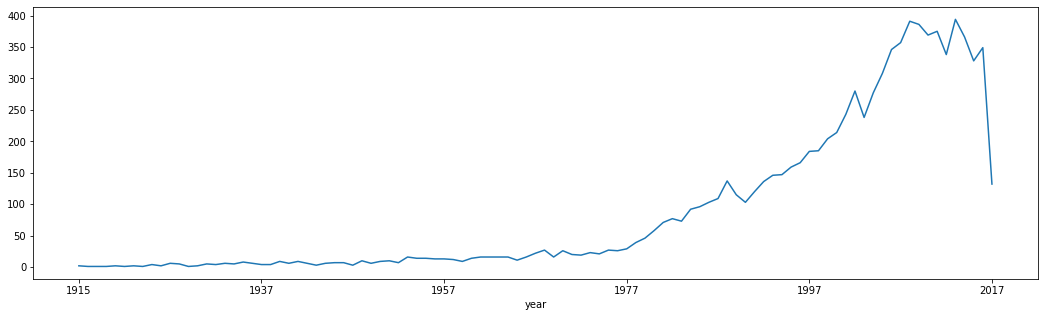

In [181]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['title_tmdb'].count().plot()

We notice that there is a sharp rise in the number of movies **starting the 1990s decade**. However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

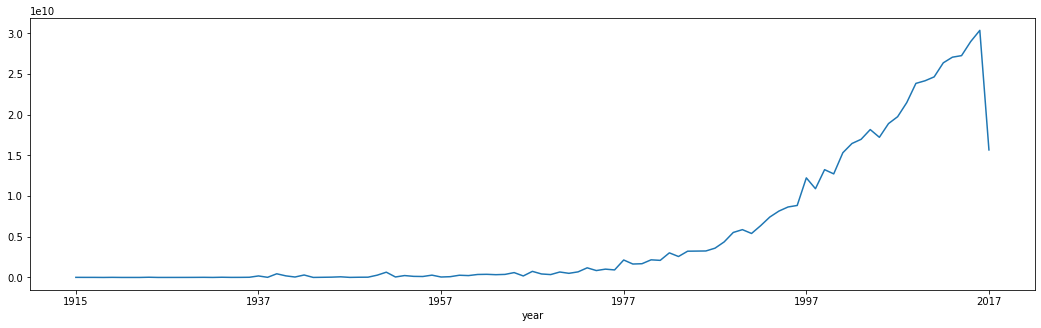

In [182]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['revenue'].sum().plot()

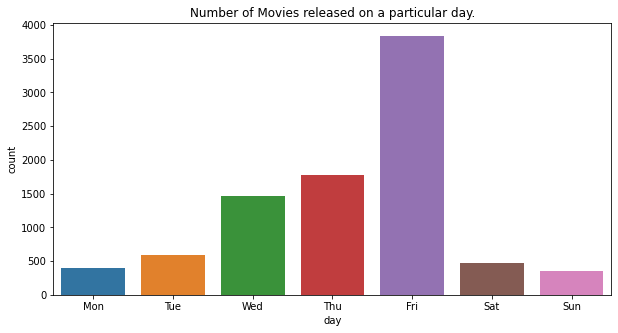

In [183]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=clean_df, order=day_order)

In [184]:
clean_df['is_Friday'] = clean_df['day'].apply(lambda x: 1 if x=='Fri' else 0)

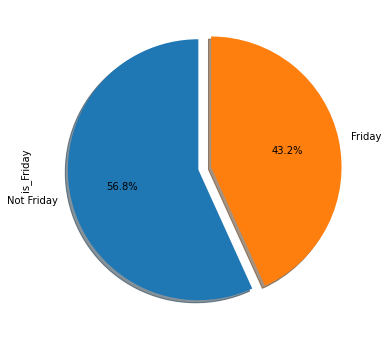

In [185]:
clean_df['is_Friday'].value_counts().plot(kind='pie',labels=['Not Friday','Friday'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

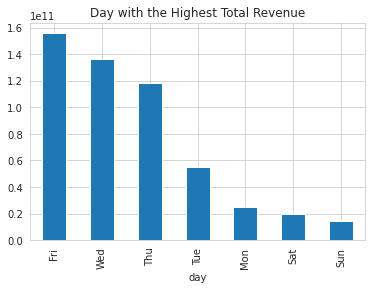

In [186]:
sns.set_style('whitegrid')
plt.title('Day with the Highest Total Revenue')
clean_df.groupby('day')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

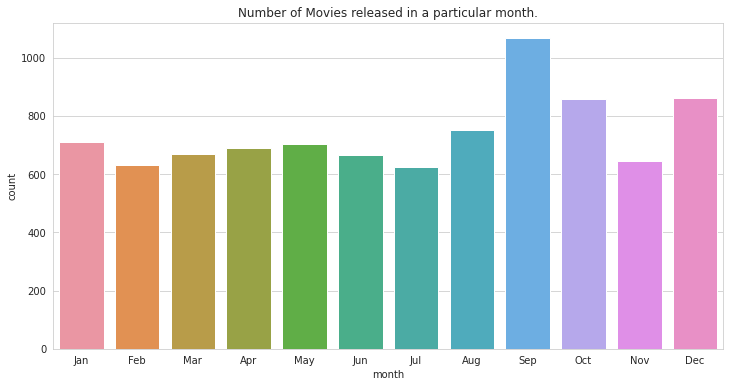

In [187]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=clean_df, order=month_order)

In [188]:
clean_df['is_Holiday'] = clean_df['month'].apply(lambda x: 1 if x in ['Jan', 'Sep', 'Oct', 'Dec'] else 0)

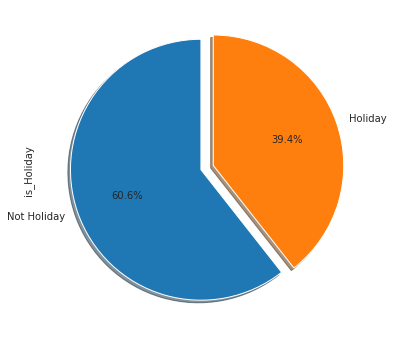

In [189]:
clean_df['is_Holiday'].value_counts().plot(kind='pie',labels=['Not Holiday','Holiday'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

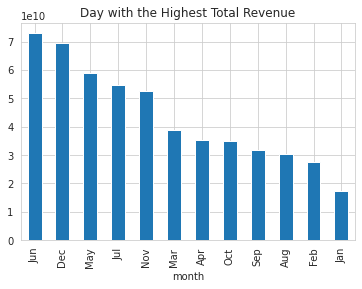

In [190]:
sns.set_style('whitegrid')
plt.title('Day with the Highest Total Revenue')
clean_df.groupby('month')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

##### **belongs_to_collection:**

Let us now have a brief look at Franchise movies:

In [191]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [192]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

Highest Grossing Movie Franchises:

In [193]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,6,6.151784e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The **Harry Potter** Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The **Star Wars** Movies come in a close second with a 7.403 billion dollars from 8 movies too. **James Bond** is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.

**Most Successful Movie Franchises (by Average Gross):**

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [194]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
112,Avatar Collection,2,1.393983e+09,2.787965e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1457,The Secret Life of Pets Collection,1,8.754579e+08,8.754579e+08
1550,Transformers Collection,5,8.732202e+08,4.366101e+09


The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise with at least 5 movies.

**Longest Running Franchises:**

Finally, in this subsection, let us take a look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.

In [195]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
1262,The Bowery Boys,29,0.000000e+00,0.000000e+00
1545,Totò Collection,27,0.000000e+00,0.000000e+00
1666,Zatôichi: The Blind Swordsman,26,0.000000e+00,0.000000e+00
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1270,The Carry On Collection,25,0.000000e+00,0.000000e+00
976,Pokémon Collection,22,3.174095e+07,6.983008e+08
238,Charlie Chan (Sidney Toler) Collection,21,0.000000e+00,0.000000e+00
514,Godzilla (Showa) Collection,16,0.000000e+00,0.000000e+00
369,Dragon Ball Z (Movie) Collection,15,7.474746e+06,1.121212e+08
1584,Uuno Turhapuro,15,0.000000e+00,0.000000e+00


The James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

0    7381
1    1499
Name: belongs_to_collection, dtype: int64

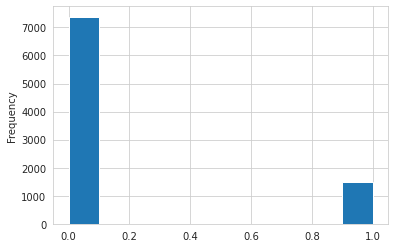

In [196]:
clean_df['belongs_to_collection'].plot.hist()
clean_df['belongs_to_collection'].value_counts()

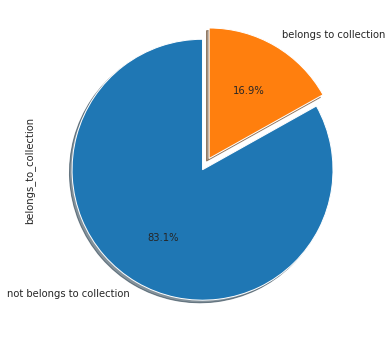

In [197]:
clean_df['belongs_to_collection'].value_counts().plot(kind='pie',labels=['not belongs to collection','belongs to collection'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

##### **homepage:**

0    6362
1    2518
Name: homepage, dtype: int64

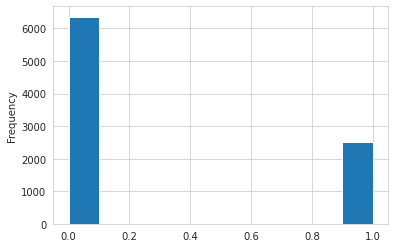

In [198]:
clean_df['homepage'].plot.hist()
clean_df['homepage'].value_counts()

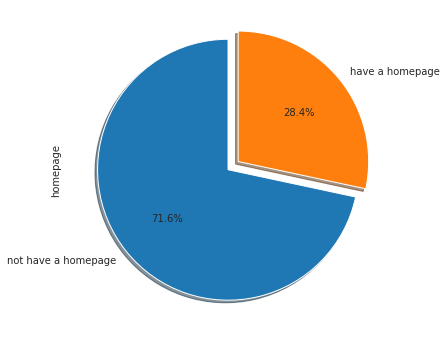

In [199]:
clean_df['homepage'].value_counts().plot(kind='pie',labels=['not have a homepage','have a homepage'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

##### **budget and revenue:**

In [200]:
clean_df[['budget_tmdb','revenue']].describe()

,budget_tmdb,revenue
count,8.880000e+03,8.880000e+03
mean,2.319239e+07,5.911190e+07
std,3.389310e+07,1.357627e+08
min,1.000000e+00,1.000000e+00
25%,3.587500e+06,1.497525e+06
50%,1.100000e+07,1.231159e+07
75%,2.800000e+07,5.186141e+07
max,3.800000e+08,2.787965e+09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


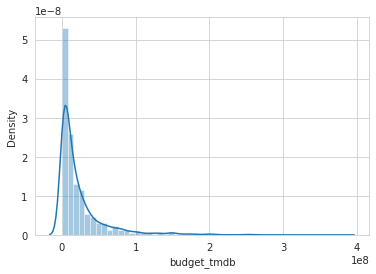

In [201]:
sns.distplot(clean_df['budget_tmdb'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


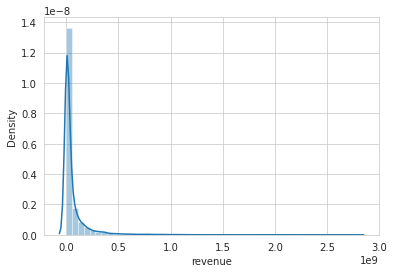

In [202]:
sns.distplot(clean_df['revenue'])

we have the budget, the same situation of skewness of budget.

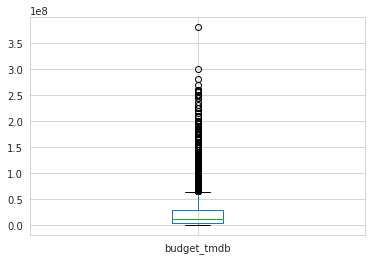

In [203]:
bud_box = clean_df.boxplot(['budget_tmdb'], showfliers=True)

We noticed that all the movies with more than 50 bilions are considered as outliers. On one hand because not all the film are 'Blockbuster'. On the other hand, there can be many outliers near to zero.

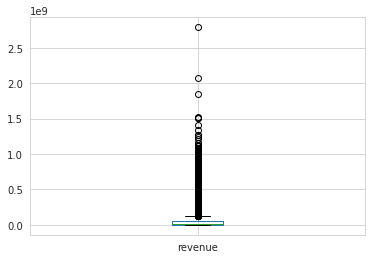

In [204]:
bud_box = clean_df.boxplot(['revenue'], showfliers=True)

In [ ]:
clean_df[['title_tmdb', 'budget_tmdb', 'revenue','return', 'year']].sort_values('budget_tmdb', ascending=False).head(10)

Two Pirates of the Carribean films occupy the top positions in this list with a budget of over 300 million dollars. Despite the fact that we are facing particularly expensive productions, The Lone Ranger earned only 35% of its investment, taking 90 million dollars on a 255 million dollar budget. A loss of 165.710.090 dollars that seems incredible among these blockbusters, to show once again that no data can be underestimated (actually treated as an outlier).

In [205]:
clean_df[['title_tmdb', 'budget_tmdb', 'year']].sort_values('budget_tmdb', ascending=False).tail(10)

,title_tmdb,budget_tmdb,year
1392,Lost & Found,1.0,1999
7244,She Monkeys,1.0,2011
6855,Aquí Entre Nos,1.0,2012
8011,The Letters,1.0,2015
2153,Less Than Zero,1.0,1987
4071,Incident at Loch Ness,1.0,2004
6375,"Love, Wedding, Marriage",1.0,2011
1195,Slam,1.0,1998
1814,Modern Times,1.0,1936
7463,Fear Clinic,1.0,2014


These is the number of movies under the 25 percentile of budget

In [206]:
clean_df['budget_tmdb'].quantile(q=0.25, interpolation='linear')

3587500.0

In [207]:
(clean_df['budget_tmdb']<=3.512454e+06).sum()

2216

but we focused on the 1 percentile

In [208]:
clean_df['budget_tmdb'].quantile(q=0.01, interpolation='linear'), clean_df['revenue'].quantile(q=0.01, interpolation='linear')

(342.53000000000003, 736.1200000000001)

In [209]:
(clean_df['budget_tmdb']<=391).sum(), (clean_df['revenue']<=745.4).sum()

(90, 90)

There are 89 movies that cost less than 350 dollars

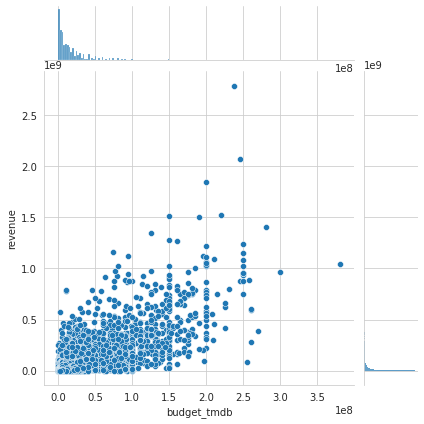

In [210]:
sns.jointplot(x='budget_tmdb',y='revenue',data=clean_df)

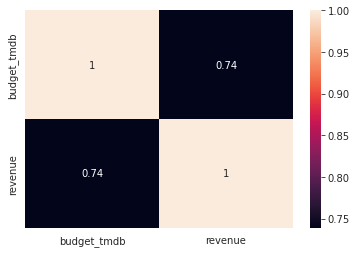

In [211]:
sns.heatmap(clean_df[['budget_tmdb','revenue']].corr(), annot = True)

Due to this high correlation and a too wide range of values, instead of predict the revenues, a good idea can be predict the return=revenue/budget

In [212]:
clean_df['return'] = clean_df['revenue'] / clean_df['budget_tmdb']
clean_df[clean_df['return'].isnull()].shape

(0, 31)

##### **popularity and runtime:**

In [213]:
clean_df['popularity'].describe()

count    8880.000000
mean        7.749110
std        11.367325
min         0.000001
25%         2.920307
50%         6.657757
75%        10.247292
max       547.488298
Name: popularity, dtype: float64

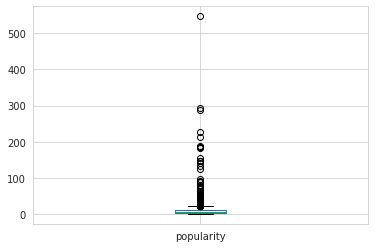

In [214]:
clean_df.boxplot(['popularity'], showfliers=True)

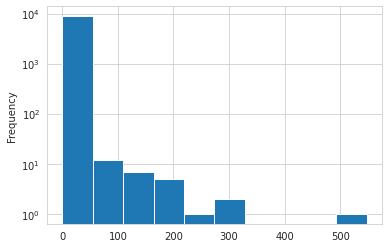

In [215]:
clean_df['popularity'].plot(logy=True, kind='hist')

Box plot and Log Popularity shows that there is a lot of difference between the mean (almost 3) and the maxium value of 547. So we will show the most popular movies and the least popular movies

In [216]:
clean_df[['title_tmdb', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title_tmdb,popularity,year
7687,Minions,547.488298,2015
7885,Wonder Woman,294.337037,2017
8598,Beauty and the Beast,287.253654,2017
8727,Baby Driver,228.032744,2017
7169,Big Hero 6,213.849907,2014
7379,Deadpool,187.860492,2016
7380,Guardians of the Galaxy Vol. 2,185.330992,2017
5476,Avatar,185.070892,2009
7153,John Wick,183.870374,2014
7057,Gone Girl,154.801009,2014


In [217]:
clean_df[['title_tmdb', 'popularity', 'year']].sort_values('popularity', ascending=False).tail(10)

,title_tmdb,popularity,year
7168,Felix The Cat: The Movie,0.030576,1988
5345,Just Sex and Nothing Else,0.026851,2005
4003,Jinxed!,0.019442,1982
3389,CrissCross,0.015894,1992
7423,Lovesick,0.013577,1983
1061,Cheetah,0.011574,1989
2866,Grave of the Fireflies,0.010902,1988
2160,Million Dollar Mystery,0.005351,1987
4703,Swoon,0.003013,1992
7584,Falling From Grace,0.000001,1992


It is reasonable to expect that there are movies more famous than others. In this datset there are very expensive productions and films for less than 10000 dollars

In [218]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue']].sort_values('popularity', ascending=False).head(5)

,title_tmdb,popularity,budget_tmdb,revenue
7687,Minions,547.488298,74000000.0,1.156731e+09
7885,Wonder Woman,294.337037,149000000.0,8.205804e+08
8598,Beauty and the Beast,287.253654,160000000.0,1.262886e+09
8727,Baby Driver,228.032744,34000000.0,2.245113e+08
7169,Big Hero 6,213.849907,165000000.0,6.521054e+08


In [219]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue']].sort_values('popularity', ascending=False).tail(5)

,title_tmdb,popularity,budget_tmdb,revenue
1061,Cheetah,0.011574,5000000.0,8153677.0
2866,Grave of the Fireflies,0.010902,3700000.0,516962.0
2160,Million Dollar Mystery,0.005351,10000000.0,989033.0
4703,Swoon,0.003013,250000.0,340147.0
7584,Falling From Grace,0.000001,3.0,232.0


In [220]:
clean_df['runtime'].describe()

count    8880.000000
mean      107.416104
std        20.412106
min        49.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       422.000000
Name: runtime, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


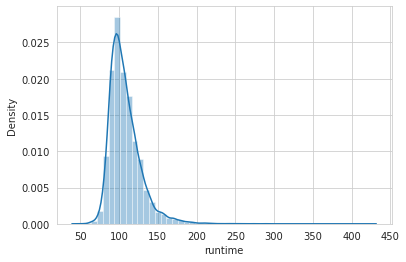

In [221]:
sns.distplot(clean_df['runtime'])

As we can expect the most frequent duration is 100 minutes.

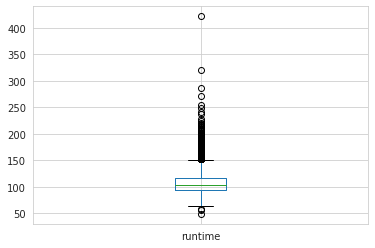

In [222]:
clean_df.boxplot(['runtime'], showfliers=True)

The Longest Movies:

In [223]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).head(10)

,runtime,title_tmdb,year
3832,422.0,War and Peace,1966
6450,320.0,Gangs of Wasseypur,2012
682,287.0,Until the End of the World,1991
6032,272.0,Mysteries of Lisbon,2010
2121,254.0,Gettysburg,1993
2230,248.0,Cleopatra,1963
740,242.0,Hamlet,1996
484,238.0,Gone with the Wind,1939
627,229.0,Once Upon a Time in America,1984
3253,224.0,Lagaan: Once Upon a Time in India,2001


The Shortest Movies:

In [224]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).tail(10)

,runtime,title_tmdb,year
532,64.0,Dumbo,1941
5869,64.0,Eccentricities of a Blonde-Haired Girl,2009
3658,64.0,Freaks,1932
5165,63.0,5 Centimeters per Second,2007
3807,63.0,The Unknown,1927
6021,63.0,Winnie the Pooh,2011
3682,63.0,The Book of Life,1998
3805,59.0,The Cheat,1915
8344,57.0,Lights of New York,1928
6899,49.0,Yu-Gi-Oh! 3D: Bonds Beyond Time,2010


Obviously, we can not consider movie out of the interquarile range as outlier because movies canhave very different durations.

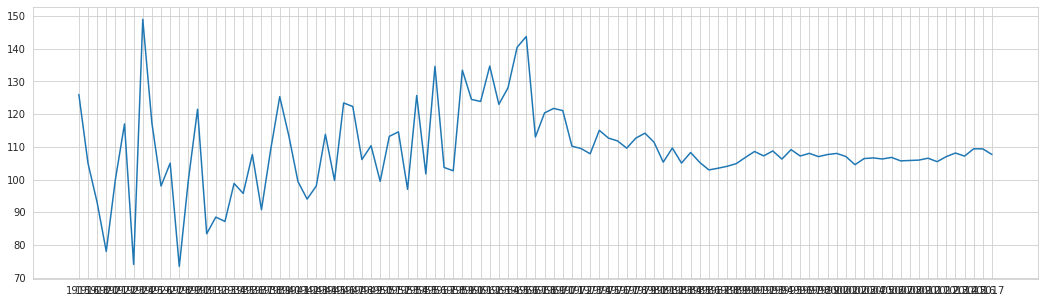

In [226]:
import matplotlib.ticker as plticker

#plt.figure(figsize=(18,5))
fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(rotation='vertical')
#plt.show()
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

Since 1915 the films seem to have no fixed duration, but with an ascending trend starting from 1932 until it stabilized. Starting 1967, films started having 110 minutes duration and has remained more or less constant ever since.

##### **production_companies and production_countries:**

In [228]:
clean_df['production_companies'] = clean_df['production_companies'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [229]:
com_df = clean_df.drop('production_companies', axis=1).join(s)

In [230]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

Highest Earning Production Companies :

In [231]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Universal Pictures,5.664201e+10,1.135110e+08,499
Warner Bros.,5.221829e+10,1.108669e+08,471
Paramount Pictures,5.009771e+10,1.118253e+08,448
Twentieth Century Fox Film Corporation,4.767337e+10,1.313316e+08,363
Walt Disney Pictures,4.170095e+10,2.622701e+08,159
Columbia Pictures,3.417959e+10,1.203507e+08,284
New Line Cinema,2.277767e+10,1.035349e+08,220
Amblin Entertainment,1.629705e+10,2.546414e+08,64
DreamWorks SKG,1.601241e+10,1.759606e+08,91
Village Roadshow Pictures,1.524061e+10,1.524061e+08,100


Most Succesful Production Companies

In [232]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Marvel Studios,1.167954e+10,7.786357e+08,15
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Lucasfilm,9.904470e+09,4.502032e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
Jerry Bruckheimer Films,9.134308e+09,3.513195e+08,26
Legendary Pictures,1.328340e+10,3.406001e+08,39
1492 Pictures,5.657217e+09,3.142898e+08,18
Ingenious Film Partners,8.114513e+09,3.005375e+08,27
Atlas Entertainment,4.795004e+09,2.820591e+08,17
DC Comics,4.759076e+09,2.799456e+08,17


In [233]:
clean_df['N_production_companies'] = clean_df['production_companies'].apply(lambda x: len(x))

3    3755
1    3005
2    2100
0      20
Name: N_production_companies, dtype: int64

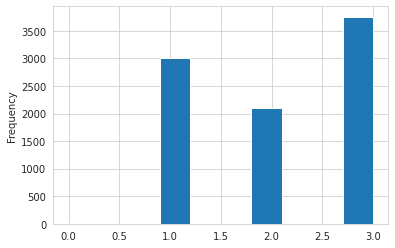

In [234]:
clean_df['N_production_companies'].plot.hist()
clean_df['N_production_companies'].value_counts()

In [235]:
clean_df['production_countries'] = clean_df['production_countries'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [236]:
con_df = clean_df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,6373,United States of America
1,964,United Kingdom
2,689,France
3,528,Germany
4,401,Canada
5,239,India
6,192,Russia
7,189,Italy
8,178,Australia
9,173,USA


In [237]:
clean_df['N_production_countries'] = clean_df['production_countries'].apply(lambda x: len(x))

1    6677
2    1481
3     722
Name: N_production_countries, dtype: int64

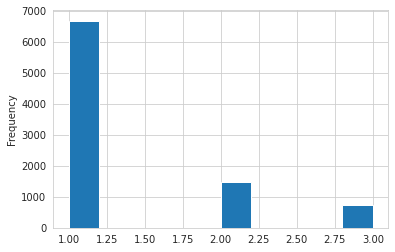

In [238]:
clean_df['N_production_countries'].plot.hist()
clean_df['N_production_countries'].value_counts()

##### **genres:**

In order to investigate on different genres we created a new dataset of genres to show the occurences of each one.

In [239]:
# Inorder to count genre
clean_df['genres'] = clean_df['genres'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['genres']).astype(str),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'

In [240]:
gen_df = clean_df.drop('genres', axis=1).join(s)

In [241]:
gen_df['genre_list'].head()

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
Name: genre_list, dtype: object

In [242]:
genres_train = gen_df['genre_list'].drop_duplicates()

In [243]:
for genre in genres_train:
  print(genre)

Animation
Comedy
Family
Adventure
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
History
Science Fiction
Mystery
Music
Foreign
Western
War
Documentary
Musical
TV Movie
Biography
Sport


In [244]:
clean_df['N_genres'] = clean_df['genres'].apply(lambda x: len(x))

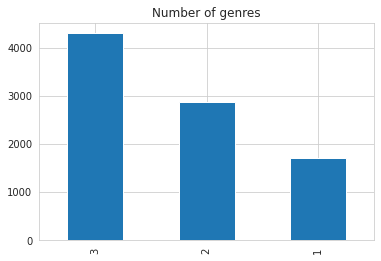

In [245]:
clean_df['N_genres'].value_counts().plot(kind='bar', title='Number of genres')

In [246]:
pop_gen = pd.DataFrame(gen_df['genre_list'].value_counts()).reset_index()
pop_gen.columns = ['genre_list', 'movies']
pop_gen.head(10)

,genre_list,movies
0,Drama,4539
1,Comedy,3141
2,Action,2064
3,Thriller,1903
4,Romance,1508
5,Adventure,1218
6,Crime,1211
7,Horror,936
8,Science Fiction,654
9,Family,609


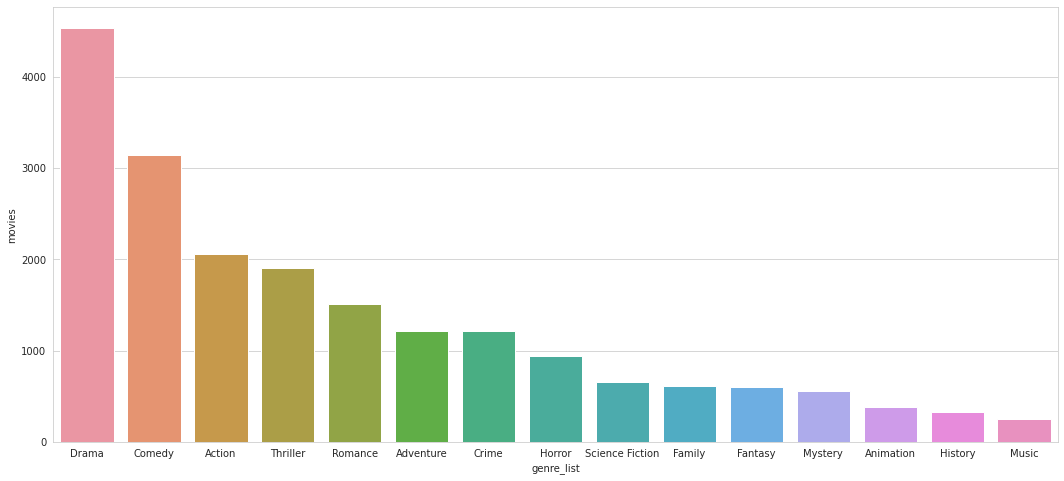

In [247]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Thriller, Romance, Adventure and Crime.

In [248]:
top_genres = ['Drama', 'Comedy', 'Action',  'Thriller','Romance','Adventure', 'Crime','Horror', 'Science Fiction', 'Fantasy']
top_movies = gen_df[(gen_df['genre_list'].isin(top_genres))]

Then we focused on popularity based on these top genres

<Figure size 1296x576 with 0 Axes>

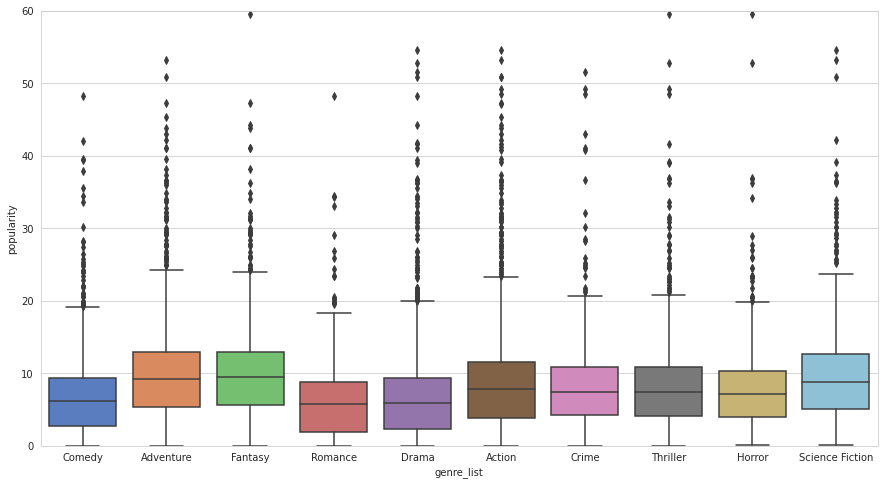

In [249]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre_list', y='popularity', data=top_movies, palette="muted", ax =ax)
ax.set_ylim([0, 60]) #not considering too high values (like 300)
plt.show()

We noted that although **drama** and **comedy** are the most frequent movies, they do not have the same popularity as genres like **fantasy** or **adventure**. All this reasoning is done in the average, not considering possibly films with very high poplarity values.

In [250]:
pop_avg=pop_gen #create a df of genre popularity avg
pop_avg['popularity_avg']=[0]*23
pop_avg.index = pop_avg["genre_list"]

In [251]:
for _, row in gen_df.iterrows():
    pop_avg['popularity_avg'].loc[row['genre_list']]+=row['popularity'] #store total popularity per genre

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [252]:
pop_gen.head()

,genre_list,movies,popularity_avg
genre_list,,,
Drama,Drama,4539,30504.332195
Comedy,Comedy,3141,21150.297933
Action,Action,2064,19942.827327
Thriller,Thriller,1903,16194.637197
Romance,Romance,1508,9489.513609


In [253]:
pop_gen['popularity_avg']=pop_gen['popularity_avg']/pop_gen['movies']

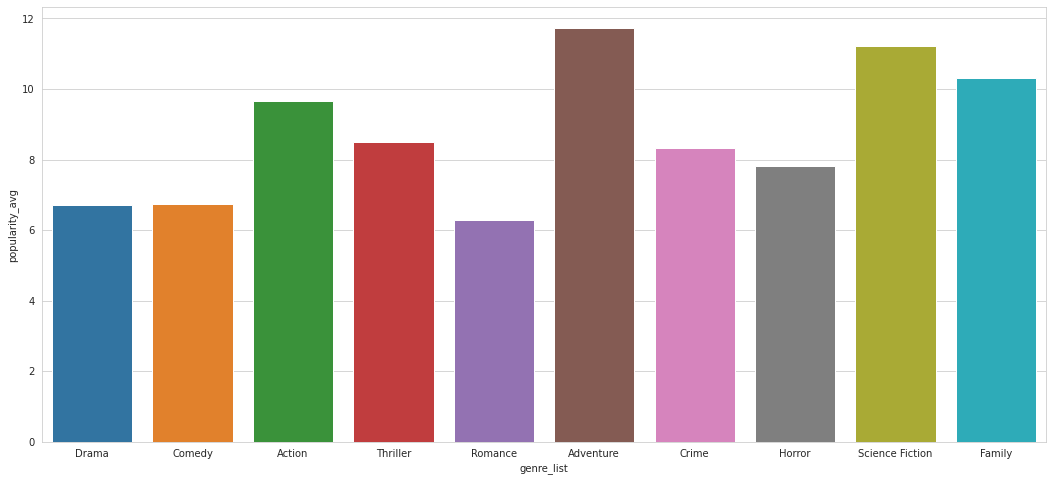

In [254]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='popularity_avg', data=pop_gen.head(10))
plt.show()

Even using all the movies, the popularity of the films in the minority seems higher than those in the majority. To testify, probably, the greatest number of people who loved certain genres. Maybe adventure movies have a larger fan base than drama or comedy.

##### **spoken_language:**

In [255]:
clean_df['spoken_languages'].value_counts()

['English']                                         5387
['English', 'Español']                               232
['English', 'Français']                              204
['Pусский']                                          151
['Français']                                         135
                                                    ... 
['', 'Pусский', '普通话']                                 1
['Pусский', 'עִבְרִית', 'English']                     1
['Latin', 'English', 'Polski']                         1
['广州话 / 廣州話', 'English', 'Bahasa melayu', '普通话']       1
['Italiano', 'Deutsch', 'English', '日本語']              1
Name: spoken_languages, Length: 887, dtype: int64

In [256]:
clean_df['N_spoken_languages'] = clean_df['spoken_languages'].apply(lambda x: len(x))

11     5771
22      623
23      421
12      181
10      163
       ... 
96        1
89        1
106       1
74        1
79        1
Name: N_spoken_languages, Length: 73, dtype: int64

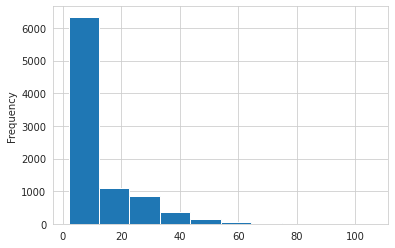

In [257]:
clean_df['N_spoken_languages'].plot.hist()
clean_df['N_spoken_languages'].value_counts()

Most movies speak only one language in the whole duration. 9 is the highest number of language spoken in a movie. 

Let's explore if movies with higher numbers of spoken language would somehow induce a higher return.

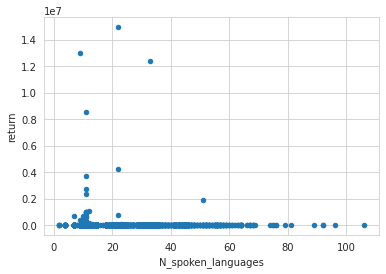

In [258]:
clean_df.plot.scatter(x='N_spoken_languages', y='return')

The scatter plot indicates there exists no evident corelation between the number of spoken languages and return. On one hand, many high return movies speaks only one languag. On the other hand, a movie speaking more than 3 languages is more likely to fail.

##### **overiew, tagline, title and keywords:**

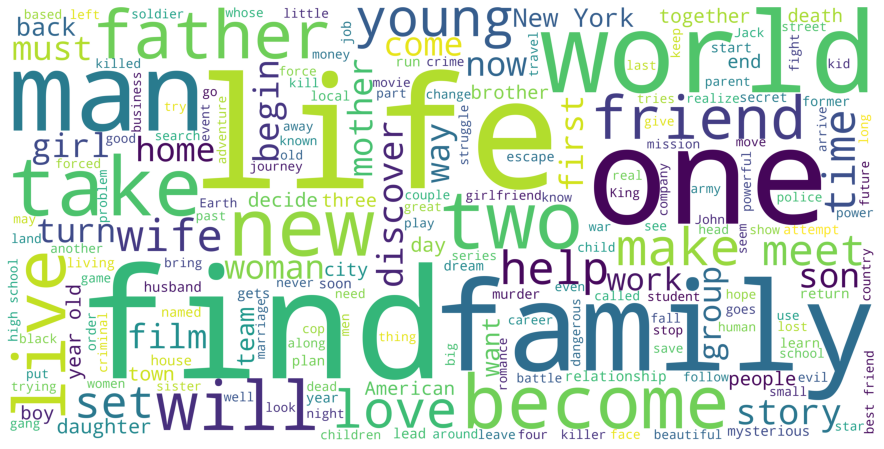

In [259]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['overview'])))
plt.axis('off')
plt.show()

**Life** is the most commonly used word in the Description. **One** and **Find** are also popular , together with **Love**, **Man** and **Girl**, these wordclouds give us a pretty good idea of the most popular themes present in movies.

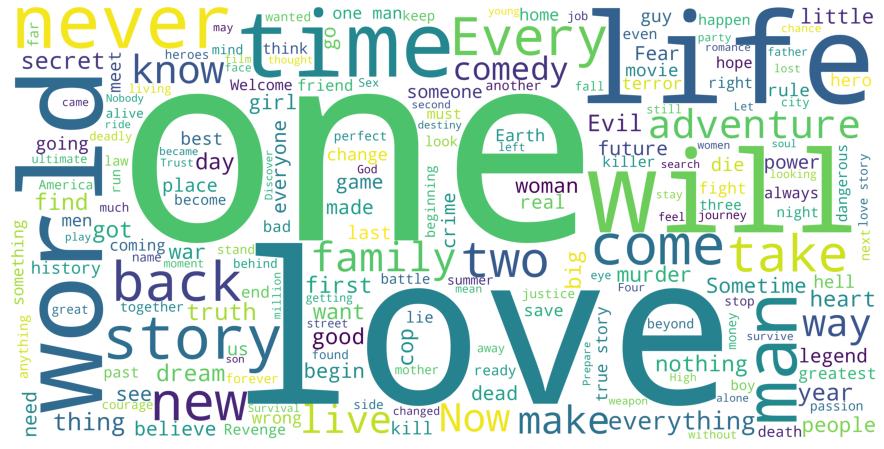

In [260]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['tagline'])))
plt.axis('off')
plt.show()

Taglines are the movies' adversing slogan, which gives quick and catchy insight into the themes. **One** and **Love** are the most commonly used word in Movie's taglines.
Together with **life**, **world** and **time**, these wordclouds give us a pretty good idea of the most popular subject present in movies.

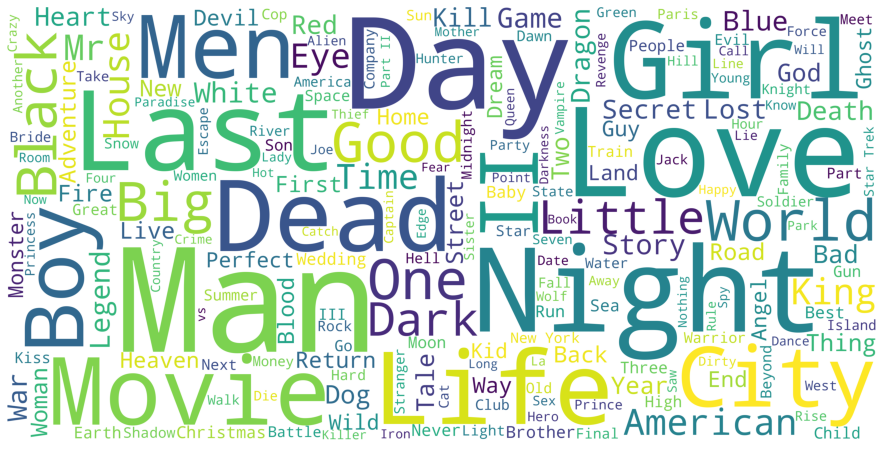

In [261]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', 
                     height=2000, width=4000).generate(' '.join(clean_df['title_tmdb'])))
plt.axis('off')
plt.show()

**Man**, **Girl**, **Love** are the most commonly used word in Movie titles. **day** and **Night** are also hot words in Movie Blurbs. These would cloud encapsulates the idea of ubiquitious presence of romance movies.

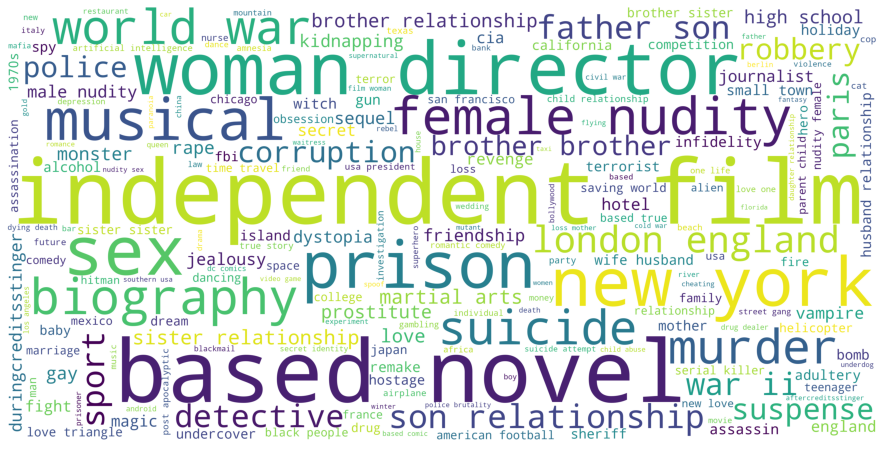

In [262]:
clean_df['keywords'] = clean_df['keywords'].apply(ast.literal_eval).values.tolist()
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, 
                     background_color='white', 
                     height=2000, 
                     width=4000).generate(' '.join(clean_df['keywords'].apply(lambda x: ','.join(map(str, x))))))
plt.axis('off')
plt.show()

**Independent**, **film**, **woman**, **director**, **based**, **novel**, **prison**, **sex** are the hottest themes in keywords, which means movies revolved around independence, momen, prison win the favor of the market.

##### **vote_count and votes:**
In this section, we will work with metrics provided to us by TMDB users and IMDB users. We will try to gain a deeper understanding of the vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

count     8880.000000
mean       476.161149
std       1028.697386
min          1.000000
25%         26.000000
50%        109.000000
75%        421.250000
max      14075.000000
Name: vote_count, dtype: float64

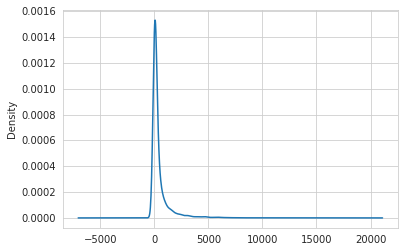

In [263]:
clean_df['vote_count'].plot.kde()
clean_df['vote_count'].describe()

count    8.880000e+03
mean     7.245815e+04
std      1.480704e+05
min      1.000000e+02
25%      4.962750e+03
50%      2.054800e+04
75%      7.338050e+04
max      2.278845e+06
Name: votes, dtype: float64

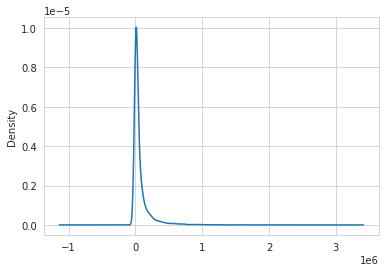

In [264]:
clean_df['votes'].plot.kde()
clean_df['votes'].describe()

Both distribution are extremely skewed. The median vote count from TMDB stands at only 100 votes. The most votes movie has got stands at 14,075. While the median vote count from IMDB has 20,490 votes, with maximum values reaching as high as 2.3 million. 
Theforefore, TMDB Votes are not as potent and suggestive as its IMDB Counterpart. Nevertheless, let us check which the most voted on both websites.

**Most voted movies by TMDB and IMDB**

Text(0.5, 1.0, 'Most voted Movies on TMDB')

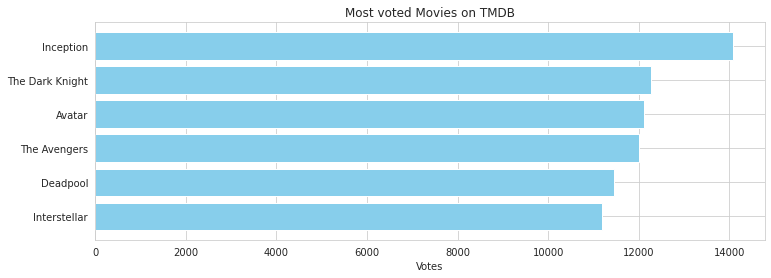

In [265]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('vote_count', ascending=False)['title_tmdb'].head(6), 
         clean_df.sort_values('vote_count', ascending=False)['vote_count'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on TMDB")

**Inception**, **The Dark Knight** gain the most voted on TMDB.

Text(0.5, 1.0, 'Most voted Movies on IMDB')

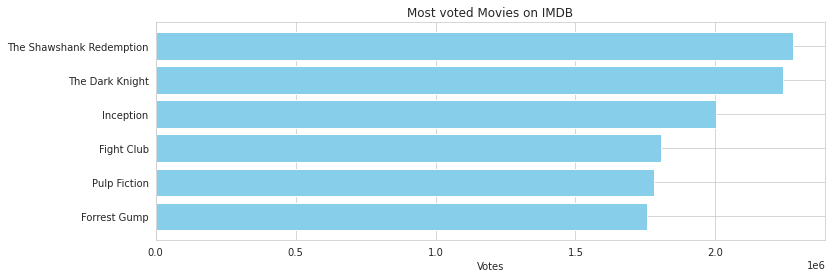

In [266]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('votes', ascending=False)['title_tmdb'].head(6),
         clean_df.sort_values('votes', ascending=False)['votes'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on IMDB")

**The Shawshank Redemption**, **The Dark Knight**, **Inception** are the most voted moives on IMDB.

##### **vote_average and avg_vote:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    8880.000000
mean        6.131453
std         0.966776
min         1.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

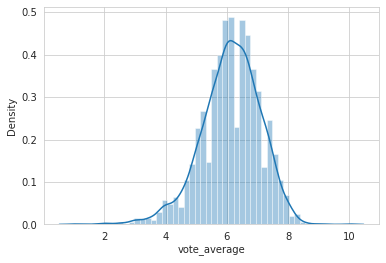

In [267]:
sns.distplot(clean_df['vote_average'])
clean_df['vote_average'].describe()

Users on TMDB are very strict with their rating. The mean rating is only a **5.6** on a scale of 10. Half of the movies have a rating lower than **6.2**.

**Hightest voted movies**

We only take into consideration of movies which have more than 5000 votes.

In [268]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'vote_average','vote_count', 'avg_vote','year']].sort_values('vote_average', ascending=False).head(10)

,title_tmdb,vote_average,vote_count,avg_vote,year
190,The Shawshank Redemption,8.5,8358.0,9.3,1994
450,The Godfather,8.5,6024.0,9.2,1972
180,Pulp Fiction,8.3,8670.0,8.9,1994
4935,The Dark Knight,8.3,12269.0,9.0,2008
1583,Fight Club,8.3,9678.0,8.8,1999
6222,The Intouchables,8.2,5410.0,8.5,2011
214,Forrest Gump,8.2,8147.0,8.8,1994
603,The Empire Strikes Back,8.2,5998.0,8.7,1980
159,Star Wars,8.1,6778.0,8.6,1977
36,Se7en,8.1,5915.0,8.6,1995


 **The Shawshank Redemption** and **The Godfather** are voted as the highest movies. Interstingly, they also have a very high rating in IMDB (over 9).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    8880.000000
mean        6.347680
std         1.039596
min         1.100000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.300000
Name: avg_vote, dtype: float64

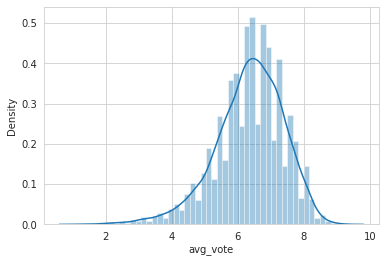

In [269]:
sns.distplot(clean_df['avg_vote'])
clean_df['avg_vote'].describe()

Users on IMDB are less strict with their ratings. The mean rating is a **6.3** on a scale of 10, higher than the mean rating on TMDB. 

**Hightest voted movies**

Similar to the previous case, we only take into consideration of movies which have more than 5000 votes.

In [270]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'avg_vote','votes', 'vote_average','year']].sort_values('avg_vote', ascending=False).head(10)

,title_tmdb,avg_vote,votes,vote_average,year
190,The Shawshank Redemption,9.3,2278845.0,8.5,1994
450,The Godfather,9.2,1572674.0,8.5,1972
4935,The Dark Knight,9.0,2241615.0,8.3,2008
180,Pulp Fiction,8.9,1780147.0,8.3,1994
3410,The Lord of the Rings: The Return of the King,8.9,1604280.0,8.1,2003
1583,Fight Club,8.8,1807440.0,8.3,1999
5681,Inception,8.8,2002816.0,8.1,2010
214,Forrest Gump,8.8,1755490.0,8.2,1994
2577,The Lord of the Rings: The Fellowship of the Ring,8.8,1619920.0,8.0,2001
603,The Empire Strikes Back,8.7,1132073.0,8.2,1980


 Interstingly, **The Shawshank Redemption** and **The Godfather** are also voted as the highest movies on IMDB. 

Study correlations between votes on TMDB/IMDB(vote_average/avg_vote) and other features.

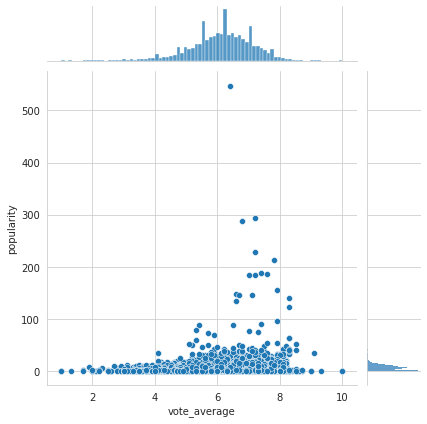

In [271]:
sns.jointplot(x='vote_average', y='popularity', data=clean_df)

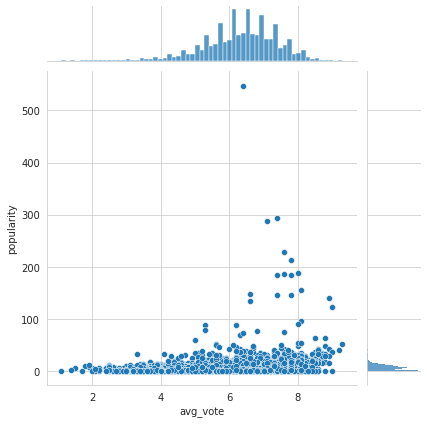

In [272]:
sns.jointplot(x='avg_vote', y='popularity', data=clean_df)

Popularity and vote does not have a tangible corelation. A high voted movie does not imply it is popular.

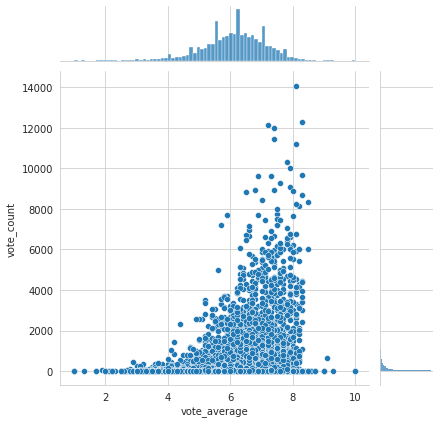

In [273]:
sns.jointplot(x='vote_average', y='vote_count', data=clean_df)

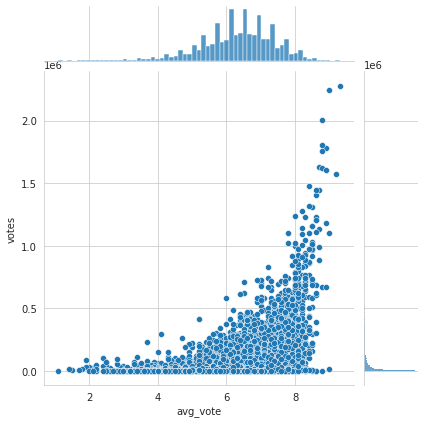

In [274]:
sns.jointplot(x='avg_vote', y='votes', data=clean_df)

There is no strong corelation between *vote_count/votes* and *vote_average/avg_vote*, meaning a larget number of votes on a particular movie does not necessarily imply the movie is good.

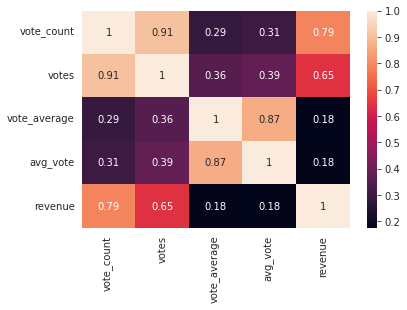

In [275]:
sns.heatmap(clean_df[['vote_count','votes','vote_average','avg_vote','revenue']].corr(), annot = True)

There are strong corrlation between votes on TMDB/IMDB and revenue.

##### **actors, director and writer:**

Actors with the Highest Total Revenue

In [276]:
clean_df['actors_tmdb'] = clean_df['actors_tmdb'].apply(ast.literal_eval).values.tolist()
s = clean_df['actors_tmdb'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actor_df = clean_df.drop('actors_tmdb', axis=1).join(s)

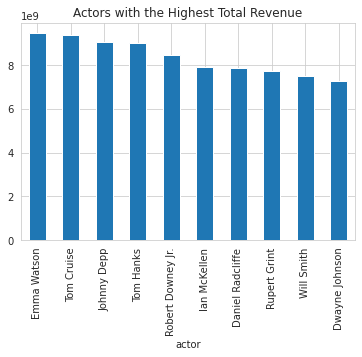

In [277]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
actor_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

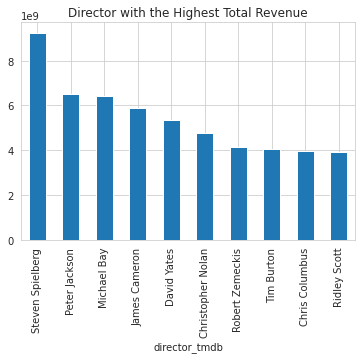

In [278]:
sns.set_style('whitegrid')
plt.title('Director with the Highest Total Revenue')
clean_df.groupby('director_tmdb')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

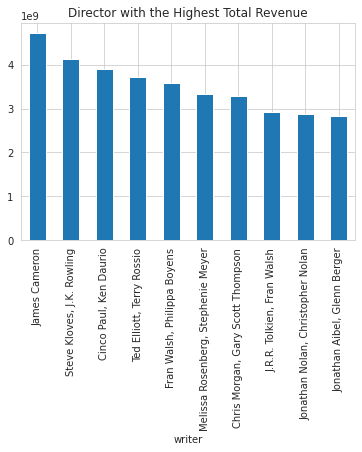

In [279]:
sns.set_style('whitegrid')
plt.title('Director with the Highest Total Revenue')
clean_df.groupby('writer')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

##### **original_language:** 


In [280]:
clean_df['original_language'].drop_duplicates().shape[0]

54

In [281]:
lang_df = pd.DataFrame(clean_df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,7441,en
fr,229,fr
ru,160,ru
hi,142,hi
es,121,es


There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.

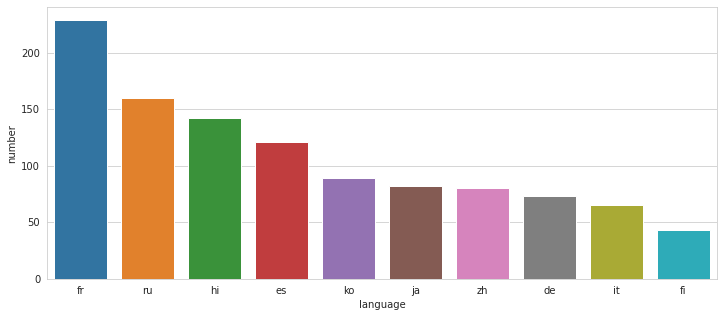

In [282]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

As mentioned earlier, **French** and **Italian** are the most commonly occurring languages after **English**. **Japanese** and **Hindi** form the majority as far as Asian Languages are concerned.

original_language will be replaced by a feature called **is_English** to denote if a particular film is in English or another Language.

In [283]:
clean_df['is_english'] = clean_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
clean_df = clean_df.drop('original_language', axis=1)

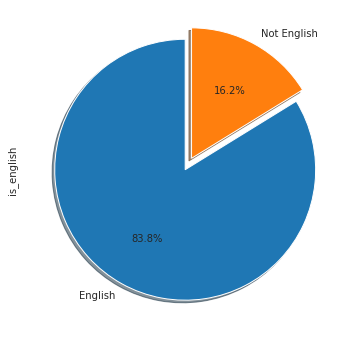

In [284]:
clean_df['is_english'].value_counts().plot(kind='pie',labels=['English','Not English'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

##4.**Motivation and Proposal:**

We all know how the economic return  a producer can get from a film is important. The purpose of ​​our task is to be able to predict the economic return of a movie starting from its characteristics. The idea is to use a regression, not only stopping us at a quantitative classification (accuracy), but also trying to find the variables that most influence the success of the movie through an explainer. As we are convinced that a prediction without an explanation remains unusable.
Once the prediction has been realized, we would like to dedicate ourselves to the creation of a protoptype of recommender system based on keywords and votes (perhaps adding datasets). Obviously not trying to compete with the netflix one, which currently seems to be the state of the art, but giving a first structure to a system that in a world like today's: so full of data, it becomes necessary not to leave the user alone in navigation and allows to increase the appeal of the site.